# **California Housing Prices**

In [46]:
# importing libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm    
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading California Housing Data

In [47]:
file_path =  r"C:\Users\XANDER\Videos\TECH\Tatev\housing.csv"

In [48]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [49]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [52]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

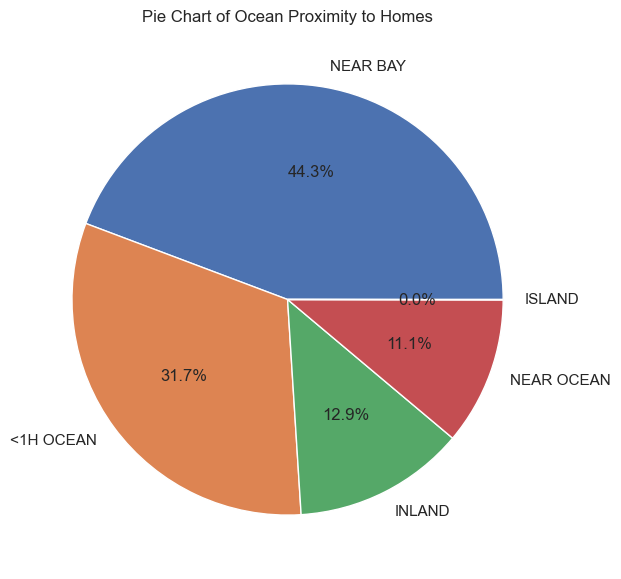

In [53]:
plt.figure(figsize = (8,7))
plt.pie(data["ocean_proximity"].value_counts(), labels = data["ocean_proximity"].unique(), autopct = "%1.1f%%")
plt.title("Pie Chart of Ocean Proximity to Homes")
plt.show()

## Missing Data Analysis

In [54]:
# check for missing data
missing_values = data.isnull().sum()

# calculate the percentage of missing values
missing_percentage = (missing_values/ len(data)) * 100

# Displaying the missing data statistics
print(f"Missing value in each column: {missing_values}\n")
print(f"Percentage of missing values in eeach column: {missing_percentage}%")

Missing value in each column: longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of missing values in eeach column: longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64%


In [55]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify if mising values are removed
print("Missing values in columns after removal:")
print(data_cleaned.isnull().sum())

Missing values in columns after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [56]:
# checking for duplicates
data_cleaned.duplicated().any()

np.False_

# Data Exploration and Visualization

In [57]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [58]:
data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


[]

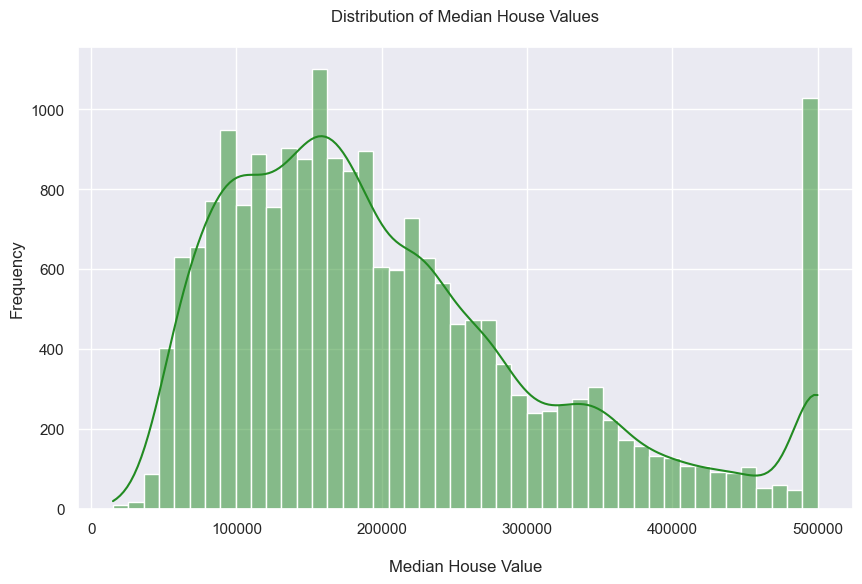

In [59]:
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))
sns.histplot(data_cleaned["median_house_value"], color = "forestgreen", kde = True)
plt.title("Distribution of Median House Values\n")
plt.xlabel("\nMedian House Value")
plt.ylabel("Frequency")
plt.plot()

# Boxplot for Outlier Detection

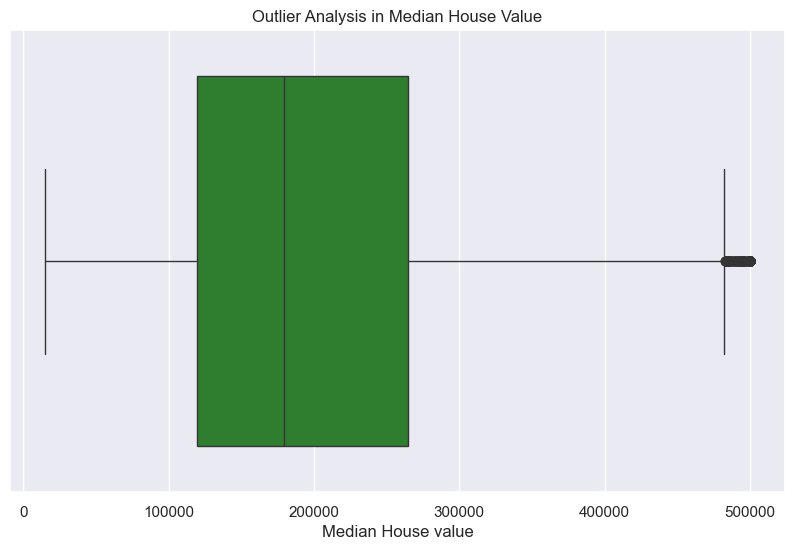

In [60]:
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))
sns.boxplot(x = data_cleaned["median_house_value"], color = "forestgreen")
plt.title("Outlier Analysis in Median House Value")
plt.xlabel("Median House value")
plt.show()

# Using InterQuantile Range to Remove Outliers

In [61]:
Q1 = data_cleaned["median_house_value"].quantile(0.25)
print(f"First Quantile of the median house value: {Q1}\n")

Q3 = data_cleaned["median_house_value"].quantile(0.75)
print(f"Third Quantile of the median house value: {Q3}\n")

IQR = Q3 - Q1
print(f"InterQuantile Range: {IQR}\n")

# Define the limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_with_no_outlier_1 = data_cleaned[(data_cleaned["median_house_value"] >= lower_bound) & (data_cleaned["median_house_value"] <= upper_bound)]

print(f"Original data shape: {data_cleaned.shape}\n")
print(f"New data shape: {data_with_no_outlier_1.shape}")

First Quantile of the median house value: 119500.0

Third Quantile of the median house value: 264700.0

InterQuantile Range: 145200.0

Original data shape: (20433, 10)

New data shape: (19369, 10)


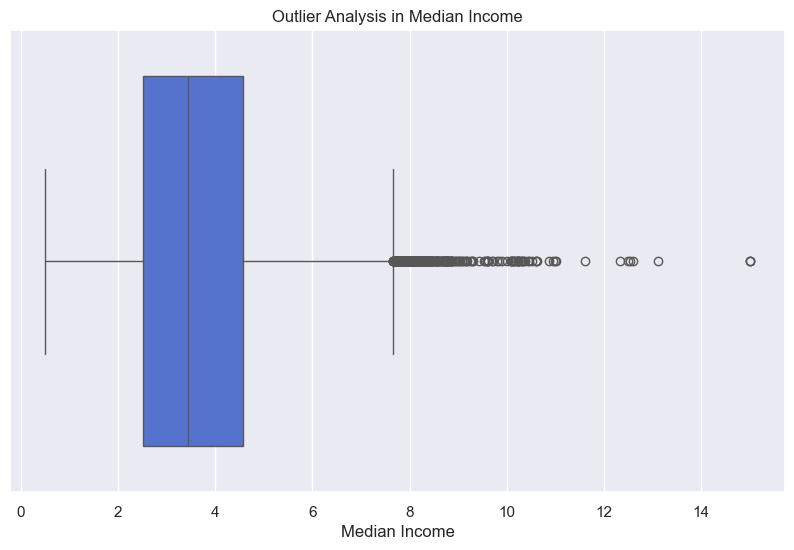

In [62]:
sns.set(style = "darkgrid")
plt.figure(figsize = (10, 6))
sns.boxplot(x = data_with_no_outlier_1["median_income"], color = "royalblue")
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income")
plt.show()

In [63]:
Q1 = data_with_no_outlier_1["median_house_value"].quantile(0.25)
print(f"First Quantile of the median house value: {Q1}\n")

Q3 = data_with_no_outlier_1["median_house_value"].quantile(0.75)
print(f"Third Quantile of the median house value: {Q3}\n")

IQR = Q3 - Q1
print(f"InterQuantile Range: {IQR}\n")

# Define the limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_with_no_outlier_2 = data_with_no_outlier_1[(data_with_no_outlier_1["median_house_value"] >= lower_bound) & (data_with_no_outlier_1["median_house_value"] <= upper_bound)]

print(f"Orginal data shape: {data_with_no_outlier_1.shape}\n")
print(f"New data shape: {data_with_no_outlier_2.shape}")

First Quantile of the median house value: 116100.0

Third Quantile of the median house value: 246400.0

InterQuantile Range: 130300.0

Orginal data shape: (19369, 10)

New data shape: (19095, 10)


In [64]:
data = data_with_no_outlier_2

In [65]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [66]:
data.select_dtypes(include="number").corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923785,-0.101821,0.046342,0.071522,0.103465,0.058574,-0.011609,-0.047286
latitude,-0.923785,1.000000,0.005941,-0.034066,-0.069146,-0.116297,-0.075059,-0.074570,-0.151900
housing_median_age,-0.101821,0.005941,1.000000,-0.373415,-0.329277,-0.293477,-0.311261,-0.203450,0.053025
total_rooms,0.046342,-0.034066,-0.373415,1.000000,0.935393,0.859563,0.922551,0.223715,0.147781
total_bedrooms,0.071522,-0.069146,-0.329277,0.935393,1.000000,0.878997,0.978965,0.025266,0.082468
population,0.103465,-0.116297,-0.293477,0.859563,0.878997,1.000000,0.909115,0.046874,0.023970
households,0.058574,-0.075059,-0.311261,0.922551,0.978965,0.909115,1.000000,0.050091,0.102936
median_income,-0.011609,-0.074570,-0.203450,0.223715,0.025266,0.046874,0.050091,1.000000,0.643091
median_house_value,-0.047286,-0.151900,0.053025,0.147781,0.082468,0.023970,0.102936,0.643091,1.000000


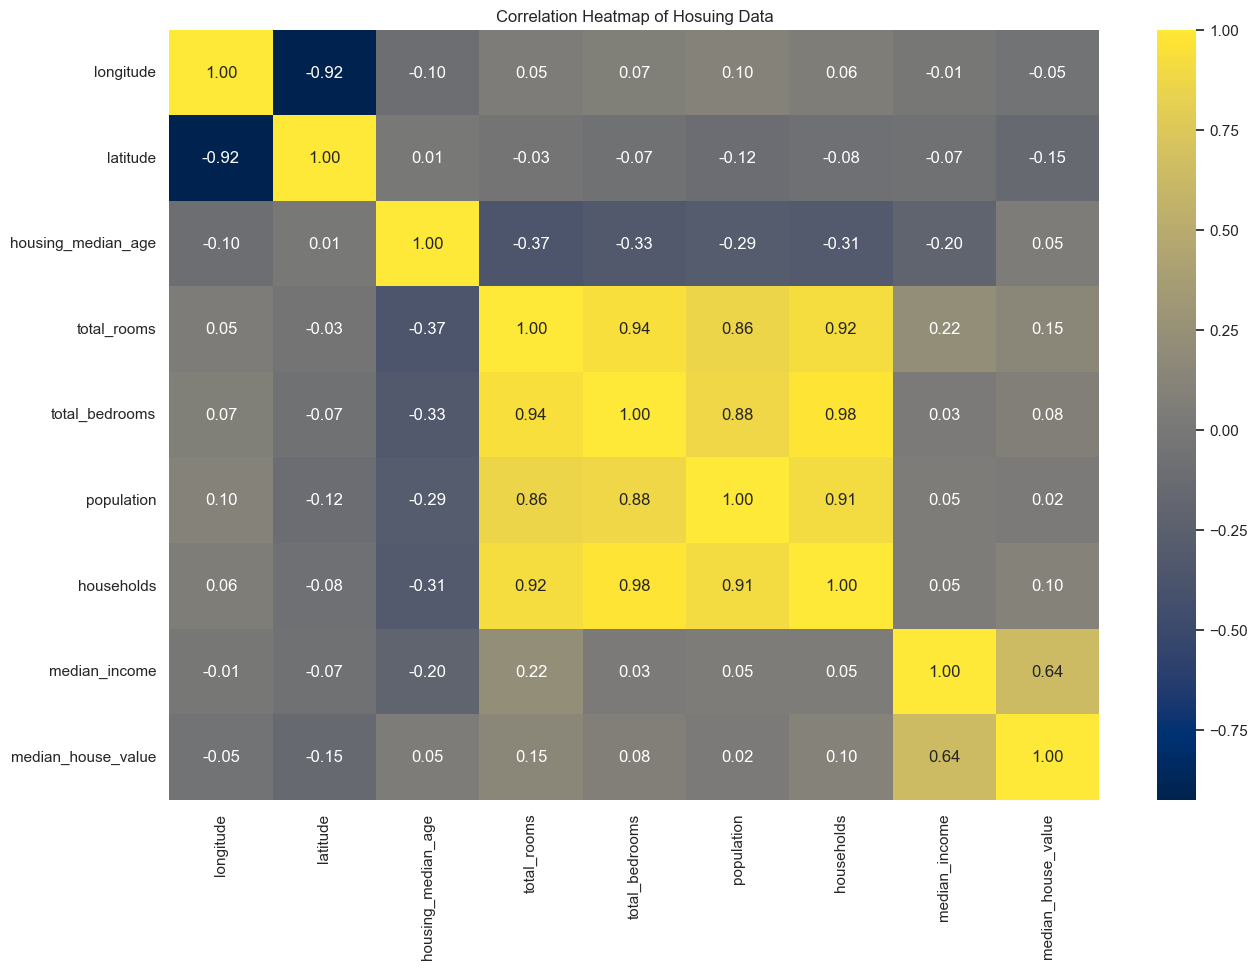

In [67]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.select_dtypes(include="number").corr(), annot = True, fmt = ".2f", cbar = True, cmap = "cividis")
plt.title("Correlation Heatmap of Hosuing Data")
plt.show()

- Part of the rules of linear regression is handling multiple collinearity.
- Multicollinearity is a statistical phenomenon where two or more independent variable are highly correlated, this can affect the performance of our model.
- Looking at the heatmap above, "total_bedrooms" has the highest correlation with "households" and "total _rooms" with a very low correlation with the dependent variable, so it feels safe to drop "total_bedrooms"

In [68]:
data = data.drop(columns = "total_bedrooms", axis = 1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,NEAR BAY


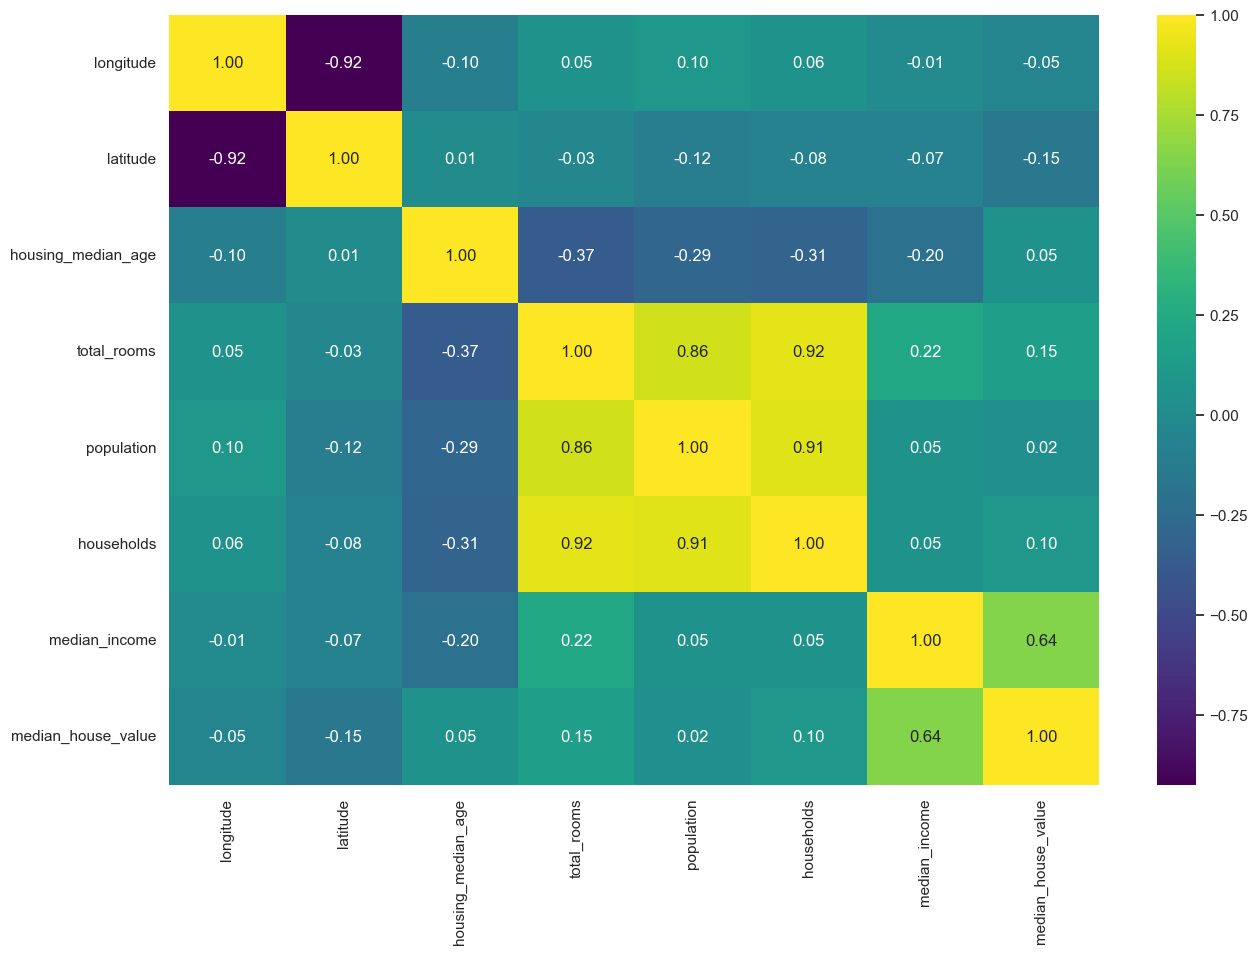

In [69]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.select_dtypes(include = "number").corr(), cmap = "viridis", annot = True, fmt = ".2f")
plt.show()

# String Data categorization to Dummy Variables

In [70]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [71]:
ocean_proximity_dummies = pd.get_dummies(data["ocean_proximity"], prefix = "ocean_proximity")
data = pd.concat([data.drop("ocean_proximity", axis = 1), ocean_proximity_dummies], axis  = 1)

In [72]:
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


- When it comes to transforming a string categorical variable to a set of dummies is that you always need to drop one of the categories,
- Because we should have no perfect multicollinearity. We can't have five different variables that are perfectly correlated.

In [73]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [74]:
data['ocean_proximity_<1H OCEAN'] = data['ocean_proximity_<1H OCEAN'].astype(int)
data['ocean_proximity_INLAND'] = data['ocean_proximity_INLAND'].astype(int)
data['ocean_proximity_ISLAND'] = data['ocean_proximity_ISLAND'].astype(int)
data['ocean_proximity_NEAR BAY'] = data['ocean_proximity_NEAR BAY'].astype(int)
data['ocean_proximity_NEAR OCEAN'] = data['ocean_proximity_NEAR OCEAN'].astype(int)

In [75]:
data

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [76]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)

In [77]:
data

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0


# Splitting into Train and Test

In [78]:
# Define the feature(independent variables) and target(dependent variables)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']

x = data[features]
y = data[target]

# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1111)

# check the size of the splits
print(f"Training set size {x_train.shape[0]} samples.")
print(f"Test set size {x_test.shape[0]} samples.")

Training set size 15276 samples.
Test set size 3819 samples.


In [79]:
x_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8498,-118.29,33.89,33.0,2138.0,1072.0,528.0,2.7428,1,0,0,0
4653,-118.33,34.06,52.0,1368.0,737.0,248.0,8.3617,1,0,0,0
10747,-117.89,33.62,24.0,1016.0,465.0,236.0,3.0625,1,0,0,0
16349,-121.36,38.03,14.0,2356.0,1378.0,481.0,3.7375,0,1,0,0
19493,-121.00,37.67,27.0,2278.0,995.0,449.0,2.5148,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15278,-117.31,33.07,21.0,2035.0,948.0,467.0,3.2984,0,0,0,1
9633,-121.06,37.18,30.0,2603.0,1491.0,473.0,3.0909,0,1,0,0
12557,-121.47,38.55,52.0,1384.0,561.0,244.0,2.0242,0,1,0,0
2862,-118.91,35.40,10.0,3587.0,1398.0,763.0,2.5690,0,1,0,0


In [80]:
# Adding a constant to the predictors because statsmodel' OLS doesn't include it by default.
x_train_const = sm.add_constant(x_train)
x_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8498,1.0,-118.29,33.89,33.0,2138.0,1072.0,528.0,2.7428,1,0,0,0
4653,1.0,-118.33,34.06,52.0,1368.0,737.0,248.0,8.3617,1,0,0,0
10747,1.0,-117.89,33.62,24.0,1016.0,465.0,236.0,3.0625,1,0,0,0
16349,1.0,-121.36,38.03,14.0,2356.0,1378.0,481.0,3.7375,0,1,0,0
19493,1.0,-121.00,37.67,27.0,2278.0,995.0,449.0,2.5148,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15278,1.0,-117.31,33.07,21.0,2035.0,948.0,467.0,3.2984,0,0,0,1
9633,1.0,-121.06,37.18,30.0,2603.0,1491.0,473.0,3.0909,0,1,0,0
12557,1.0,-121.47,38.55,52.0,1384.0,561.0,244.0,2.0242,0,1,0,0
2862,1.0,-118.91,35.40,10.0,3587.0,1398.0,763.0,2.5690,0,1,0,0


In [81]:
print(y_train.dtypes)
print(x_train_const.dtypes)

median_house_value    float64
dtype: object
const                         float64
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_INLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object


In [82]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, x_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2205.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:41:21   Log-Likelihood:            -1.8879e+05
No. Observations:               15276   AIC:                         3.776e+05
Df Residuals:                   15264   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Prediction/Testing

In [83]:
# Adding a constant to the test Predictor
x_test_const = sm.add_constant(x_test)

# Making predictions on the test set 
test_prediction = model_fitted.predict(x_test_const)
test_prediction

4291     175025.241170
8496     214387.715045
2280      97914.123196
5696     290823.791248
2466      93181.417935
             ...      
17093    209865.258105
19201    186291.954419
11002    266407.318168
4612     133333.128526
19262    208474.471772
Length: 3819, dtype: float64

# Checking OLS Assumptions

# Train/Test/Evaluation using Sklearn

# Scaling the Data

In [84]:
from sklearn.preprocessing import StandardScaler

# Initialize the Standardscaler
scaler = StandardScaler()

# Fit the scaler on thw training set and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Applying the same to the test data
x_test_scaled =  scaler.fit_transform(x_test)

In [85]:
x_train_scaled

array([[ 0.63924809, -0.82740584,  0.37507144, ..., -0.71388748,
        -0.34430693, -0.37314185],
       [ 0.61936498, -0.74866422,  1.90146283, ..., -0.71388748,
        -0.34430693, -0.37314185],
       [ 0.83807923, -0.95246605, -0.34795606, ..., -0.71388748,
        -0.34430693, -0.37314185],
       ...,
       [-0.94145944,  1.33104085,  1.90146283, ...,  1.40078097,
        -0.34430693, -0.37314185],
       [ 0.33105983, -0.127995  , -1.47266551, ...,  1.40078097,
        -0.34430693, -0.37314185],
       [-1.19993992,  0.73816279, -0.58896523, ..., -0.71388748,
        -0.34430693, -0.37314185]])

In [86]:
x_test_scaled

array([[ 0.60810309, -0.70164722,  0.62381588, ..., -0.71420098,
        -0.33241125, -0.37598247],
       [ 0.60810309, -0.79982435,  0.70292965, ..., -0.71420098,
        -0.33241125, -0.37598247],
       [-0.14339001,  0.55595518, -0.16732178, ...,  1.4001661 ,
        -0.33241125, -0.37598247],
       ...,
       [ 0.86028198, -0.86527578,  0.07001952, ..., -0.71420098,
        -0.33241125, -0.37598247],
       [ 0.61314666, -0.71567252, -0.48377685, ..., -0.71420098,
        -0.33241125, -0.37598247],
       [-1.6262019 ,  1.32734698, -0.64200438, ..., -0.71420098,
        -0.33241125, -0.37598247]])

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize the model
lr  = LinearRegression()

# Fit the model
lr_model = lr.fit(x_train_scaled, y_train)

# Make predictions on the scaled test data
prediction = lr_model.predict(x_train_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, prediction)
rmse = sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

ValueError: Found input variables with inconsistent numbers of samples: [3819, 15276]